In [ ]:
import Functions.DataUtils as d_utils
import Functions.VideoUtils as v_utils
import Functions.GlobalUtils as utils
import DATA_INFO as data_info

import cv2, os, numpy as np, matplotlib.pyplot as plt

vid = v_utils.VideoReader_cv2("Data/0_Raw/3/vid.mp4")
frame = vid.ReadFrame(260)
print(np.shape(frame))
cv2.imwrite('sample_frame.png',frame)


In [ ]:
import Functions.DataUtils as d_utils
import Functions.VideoUtils as v_utils
import Functions.GlobalUtils as utils
import DATA_INFO as data_info

import cv2, os, numpy as np, matplotlib.pyplot as plt

path = os.path.join(data_info.Raw.path, str(1), data_info.Raw.FileNames.spiro_data_file)
print(path)
spiro = d_utils.Spiro.read(path)


file = open(os.path.join(data_info.Raw.path, str(1), data_info.Raw.FileNames.spiro_timer), 'r')
lines = file.readlines()
start_times = list(np.float32(lines))
stop_times = list(np.float32(lines)+20)


_range = max(spiro.flow) - min(spiro.flow)
_min = min(spiro.flow) - _range*0.05
_max = max(spiro.flow) + _range*0.05


plt.figure(figsize=(10,2.35))
plt.plot(spiro.time_span,spiro.flow, linewidth=0.9, c='#3891a6')
plt.vlines(x = start_times,ymin = _min, ymax = _max, colors='#db5461', linewidth=1.2)
for i in range(len(start_times)):
    plt.axvspan(start_times[i], stop_times[i], color='#e3655b', alpha=0.2)

plt.ylim((_min,_max))
plt.xlim((0,spiro.time_span[-1]))

# plt.grid(True)
plt.tight_layout(pad=2)
plt.title('')
plt.xlabel('Time (s)')
plt.ylabel('Flow (L/Min)')
plt.title('Raw Respiration Flow Data for Person Number 1')
plt.savefig('sample_spiro_timer.png',dpi=800)
plt.show()

In [ ]:
import Functions.VideoUtils as v_utils
import cv2

min_r, max_r = 6, 11
min_d = 100
param1 = 100
param2 = 30
frame = cv2.imread('sample_frame.png', 0)
ret, result = v_utils.houghTransform(frame, min_r = min_r, max_r = max_r, min_d = min_d, param1 = param1, param2 = param2)
cv2.imshow('frame', result)
cv2.imwrite('param2-'+str(param2)+'.png', frame)
cv2.waitKey(0)

In [ ]:
import Functions.VideoUtils as v_utils
import Functions.DataUtils as d_utils
import Functions.GlobalUtils as g_utils
import DATA_INFO as data_info
import os, cv2, numpy as np, matplotlib.pyplot as plt


f_max, f_min = d_utils.get_data_max_min(
    data_info.Trimmed.path, 'flow', '{:02d}data.txt')

print(f_max, f_min)
normalize_to=[f_max, f_min]

plt.figure(figsize=(17,5))
for i in range(data_info.Trimmed.count()):
    data = d_utils.File.read(data_info.Trimmed.path +
                                data_info.Trimmed.FileNames.data_name.format(i) + '.txt')
    if normalize_to != None:
        data['flow'] = g_utils.normalize(data['flow'],normalize_to[0],normalize_to[1])


    time_span = np.arange(start=0, stop=len(data['flow'])/20, step=1/20)
    plt.plot(time_span ,data['flow'], linewidth=1)

plt.xlim([0,20])
plt.axhline(1,color='tab:red', linewidth=2)
plt.axhline(0,color='tab:red', linewidth=2)
plt.xlabel('time (s)')
plt.ylabel('flow')
plt.title('Normalized Data Between 193.55 and -135.82')
plt.tight_layout()
plt.savefig('sample_plot.png',dpi=500)
plt.show()


In [ ]:
import Functions.VideoUtils as v_utils
import Functions.DataUtils as d_utils
import Functions.GlobalUtils as g_utils
import DATA_INFO as data_info
import os, cv2, numpy as np, matplotlib.pyplot as plt


f_max, f_min = d_utils.get_data_max_min(
    data_info.Trimmed.path, 'flow', '{:02d}data.txt')
normalize_to=[f_max, f_min]

index = 6
video_name = '/{:02d}vid.mp4'.format(index)
data_txt = '/{:02d}data.txt'.format(index)
data = d_utils.File.read(data_info.Trimmed.path + data_txt)
data['flow'] = g_utils.normalize(data['flow'],normalize_to[0],normalize_to[1])
temp_flow, temp_volume, temp_average, temp_position_x, temp_position_y, temp_radius = g_utils.equalize_lists(data['flow'], data['volume'], data['average'],
                                                                                                            data['position_x'], data['position_y'], data['radius'])
frames_number = len(temp_flow)
time_span = np.arange(start=0, stop=frames_number/20, step=1/20)
_median = np.round(g_utils.median_filter(temp_average, 10), 5)

plt.figure(figsize=(13,3))
plt.plot(time_span, temp_average, alpha=0.5, c='#db5461')
plt.plot(time_span,_median, alpha=1,c='#db5461')
plt.legend(['ROI Average', 'Filtered ROI Average Signal'])
plt.xlim([0,20])
plt.tight_layout()
plt.xlabel('Time (s)')
plt.ylabel('ROI Average (Pixle Intensity)')
plt.title('Smoothed Flow Signal')
plt.tight_layout(pad=2)
# plt.savefig('ROI Average.png', dpi = 500)
plt.show()


In [ ]:
from distutils.log import fatal
import cv2
import Functions.VideoUtils as v_utils
import Functions.DataUtils as d_utils
import Functions.GlobalUtils as g_utils
import DATA_INFO as data_info, numpy as np
import matplotlib.pyplot as plt

vid = v_utils.VideoReader_cv2(data_info.Synced.path + data_info.Synced.FileNames.video_name.format(5) + '.mp4')
i = 0 
while True:
    print(i)
    frame = vid.ReadFrame(i)
    
    
    cv2.imshow('frame',frame)
    key = cv2.waitKeyEx(0)
    if key == 27:
        break

    elif key == 13:
        cv2.imwrite('frame{}.png'.format(i), frame)
    
    elif key == 2555904:
        i = i + 1
    elif key == 2424832:
        i = i - 1
        

    if i >= vid.length:
        break
    

<h1>Histogram</h1>

In [ ]:
import Functions.GlobalUtils as g_utils
import Functions.DataUtils as d_utils
import DATA_INFO as data_info
import matplotlib.pyplot as plt
import numpy as np
import Functions.LocalDB as db

def get_flow_data():
    all_flow = []
    for i in range(data_info.Synced.count()):
        file_data = d_utils.File.read(data_info.Synced.path + data_info.Synced.FileNames.data_name.format(i) + '.txt')
        all_flow = all_flow + file_data['flow']
    all_flow = np.array(all_flow)
    return all_flow
def get_hist(flow, df = 0.002):
    plt.figure()
    _hist = plt.hist(flow.ravel(), bins=np.arange(0, 1.00001, df), rwidth=0.5, histtype='step')
    plt.clf()
    plt.close()
    hist_x, hist_y = g_utils.convert_to_smooth_line(_hist[1][:int(1/df)], _hist[0][:int(1/df)], 100)
    return hist_x, hist_y
def get_borders():
    database = db.get_db('Data/3_Labeled/T1.C10.V20.A1/data_info.txt', d_utils.Labeled_data_info)[0]
    return database.classes_borders[1:-1]    

In [ ]:
flow = get_flow_data()
hist_x, hist_y = get_hist(flow)
borders = np.round(get_borders(), 3)

xlim = (0, max(hist_x))
ylim = (0, max(hist_y)*1.05)

with g_utils.Section_Separator('subplot'):
    plt.figure(figsize=(14, 8))
    plt.subplot(2, 1, 1)
    plt.plot(hist_x, hist_y, linewidth=2)
    plt.vlines(np.arange(0.1, 1, 0.1), ylim[0], ylim[1], color='tab:red', linewidth=1.5)
    plt.xlabel('Flow (L/Min)')
    plt.ylabel('Frames Count (n)')
    plt.title('(a) Normal Labeling - Distribution of Values of the Flow Over Frames')
    plt.xlim(xlim), plt.ylim(ylim)
    plt.xticks(np.arange(0.1, 1, 0.1)), plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(hist_x, hist_y, linewidth=2)
    plt.vlines(borders, ylim[0], ylim[1], color='tab:red', linewidth=1.5)
    plt.xlabel('Flow (L/Min)'), plt.ylabel('Frames Count (n)')
    plt.title('(b) DDL Labeling - Distribution of Values of the Flow Over Frames')
    plt.xlim(xlim), plt.ylim(ylim)
    plt.xticks(borders, rotation=60)
    plt.grid(), plt.tight_layout()
    plt.savefig('log_data/hist_norm_vs_ddl.png', dpi=800)
    plt.show()
    pass

with g_utils.Section_Separator('seperated'):
    plt.figure(figsize=(14, 5))
    plt.plot(hist_x, hist_y, linewidth=2)
    plt.vlines(np.arange(0.1, 1, 0.1), ylim[0], ylim[1], color = 'tab:red', linewidth = 1.5)
    plt.xlabel('Flow (L/Min)')
    plt.ylabel('Frames Count (n)')
    plt.title('Normal Labeling - Distribution of Values of the Flow Over Frames')
    plt.xlim(xlim), plt.ylim(ylim), plt.xticks(np.arange(0.1,1,0.1))
    plt.grid(), plt.tight_layout()
    plt.savefig('log_data/hist_norm.png', dpi=800), plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(hist_x, hist_y, linewidth=2)
    plt.vlines(borders, ylim[0], ylim[1], color = 'tab:red', linewidth = 1.5)
    plt.xlabel('Flow (L/Min)')
    plt.ylabel('Frames Count (n)')
    plt.title('DDL Labeling - Distribution of Values of the Flow Over Frames')
    plt.xlim(xlim), plt.ylim(ylim), plt.xticks(borders, rotation = 60)
    plt.grid(), plt.tight_layout()
    plt.savefig('log_data/hist_DDL.png', dpi=800), plt.show()
    pass


In [ ]:
import Augmentor
import shutil
import os

augmented = 'temp_data/augmented/'
path = 'temp_data/augment/'
image_name = [n for n in os.listdir(path) if os.path.isfile(path + n)][0]
print(image_name)



def move_imgs(subpath):
    if not os.path.isdir(augmented):
        os.mkdir(augmented)
    if not os.path.isdir(augmented+subpath):
        os.mkdir(augmented+subpath)
    list = [n for n in os.listdir(path) if n != image_name and os.path.isfile(path+n)]
    for file in list:
        shutil.move(path+file, augmented+subpath)
        count = len([n for n in os.listdir(augmented+subpath) if os.path.isfile(augmented+subpath+'/'+n)])
        os.rename(augmented+subpath+'/'+file,augmented+subpath+'/'+str(count) + '.' +image_name.split('.')[-1])

clear_start = True
if clear_start:
    shutil.rmtree(augmented)

p = Augmentor.Pipeline(path,"")
p.random_distortion(grid_height=10, grid_width=10, magnitude=40, probability=1)
p.sample(1)
move_imgs('random_distortion')

p = Augmentor.Pipeline(path,"")
p.random_erasing(probability=0.5,rectangle_area=0.2)
p.sample(1)
move_imgs('random_erasing')

p = Augmentor.Pipeline(path,"")
p.rotate(probability=0.5,max_left_rotation=20,max_right_rotation=20)
p.sample(1)
move_imgs('rotate')

p = Augmentor.Pipeline(path,"")
p.skew_tilt(probability=1,magnitude=0.99)
p.sample(1)
move_imgs('skew_tilt')


In [ ]:
import Augmentor
import shutil
import os

augmented = 'temp_data/augmented/'
path = 'temp_data/augment/'
image_name = [n for n in os.listdir(path) if os.path.isfile(path + n)][0]
print(image_name)



def move_imgs(subpath):
    if not os.path.isdir(augmented):
        os.mkdir(augmented)
    if not os.path.isdir(augmented+subpath):
        os.mkdir(augmented+subpath)
    list = [n for n in os.listdir(path) if n != image_name and os.path.isfile(path+n)]
    for file in list:
        shutil.move(path+file, augmented+subpath)
        count = len([n for n in os.listdir(augmented+subpath) if os.path.isfile(augmented+subpath+'/'+n)])
        os.rename(augmented+subpath+'/'+file,augmented+subpath+'/'+str(count) + '.' +image_name.split('.')[-1])

clear_start = True
if clear_start and os.path.isdir(augmented):
    shutil.rmtree(augmented)

n = 10

p = Augmentor.Pipeline(path,"")
p.random_distortion(grid_height=10, grid_width=10, magnitude=2, probability=1)
p.sample(n)
move_imgs('random_distortion')

p = Augmentor.Pipeline(path,"")
p.random_erasing(probability=0.5,rectangle_area=0.2)
p.sample(n)
move_imgs('random_erasing')

p = Augmentor.Pipeline(path,"")
p.rotate(probability=0.5,max_left_rotation=20,max_right_rotation=20)
p.sample(n)
move_imgs('rotate')

p = Augmentor.Pipeline(path,"")
p.skew_tilt(probability=1,magnitude=0.35)
p.sample(n)
move_imgs('skew_tilt')

p = Augmentor.Pipeline(path,"")
p.random_contrast(probability=1,min_factor=0,max_factor=1)
p.sample(n)
move_imgs('random_contrast')


In [ ]:
import Functions.GlobalUtils as g_utils
import Functions.LocalDB as db
import matplotlib.pyplot as plt
from Functions.CNN import CNN
import numpy as np

np.set_printoptions(2)
data = db.get_db('temp_data/acc-vs-augmentation.txt', CNN.hist)

data = [d for d in data if ((int(d.model_info.split('.')[3][1:])%5 == 0) or (int(d.model_info.split('.')[3][1:]) == 1))]

rank_func = np.max
ranks_max = [rank_func(h.val_accuracy) for h in data]
ranks_max_x = [int(h.model_info.split('.')[3][1:]) for h in data]

rank_func = np.min
ranks_min = [rank_func(h.val_accuracy) for h in data]
ranks_min_x = [int(h.model_info.split('.')[3][1:]) for h in data]


data.sort(key=lambda x:rank_func(x.val_accuracy), reverse=True)
# for h in data:
#     temp = [h.id]
#     temp.append(np.round(rank_func(h.val_accuracy),4))
#     temp.append(int(h.model_info.split('.')[3][1:]))
#     print(*[str(t) + '\t' for t in temp])

# plt.plot(ranks_max_x, ranks_max)
# plt.plot(ranks_min_x, ranks_min)

plt.figure(figsize=(15,7.5))

plt.plot(*g_utils.convert_to_smooth_line(ranks_max_x, np.array(ranks_max)*100,kind='quadratic'),label='Max Accuracy', color='tab:red')
plt.plot(ranks_max_x, np.array(ranks_max)*100, 'o', fillstyle='full', markersize='7', color='tab:red')

plt.plot(*g_utils.convert_to_smooth_line(ranks_min_x, np.array(ranks_min)*100,kind='quadratic'),label='Min Accuracy', color='tab:blue')
plt.plot(ranks_min_x, np.array(ranks_min)*100, 'o', fillstyle='full', markersize='7', color='tab:blue')

plt.xticks(ranks_max_x)
plt.legend()
plt.xlim([min(ranks_max_x), max(ranks_max_x)])
# plt.ylim([0,100])
plt.grid()
plt.title('Accuracy vs Augmentation Ratio')
plt.xlabel('Augmentation Ratio')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('acc-vs-augmentation.png', dpi=800)
plt.show()

In [ ]:
import Functions.LocalDB as db
import matplotlib.pyplot as plt
import matplotlib as mpl
from Functions.CNN import CNN
import numpy as np
import Functions.GlobalUtils as g_utils
import os


def plot_acc_rate(_name, plot=True, save=False, show_plot=True, single_mode=False):
    fitted = []
    m_fit_power = 3
    bests = g_utils.Signal([], [], [])
    if show_plot:
        plt.figure(figsize=(18, 5))

    indexes = [0] if single_mode else range(10)
    for i in indexes:
        file_name = _name.format(i)
        if not os.path.isfile(file_name):
            break
        data = db.get_db(file_name, CNN.hist)
        data.sort(key=lambda t: float(t.model_info.split(
            '.')[-2]+'.'+t.model_info.split('.')[-1]))

        signal = g_utils.Signal(
            X=range(len(data)),
            X_LBL=[float(t.model_info.split('.')[-2]+'.' +
                         t.model_info.split('.')[-1]) for t in data],
            Y=[np.mean(t.val_accuracy) for t in data]
        )

        bests.Y = np.hstack((bests.Y, max(signal.Y)))
        bests.X = np.hstack(
            (bests.X, signal.X[list(signal.Y).index(bests.Y[-1])]))
        bests.X_LBL = np.hstack(
            (bests.X_LBL, signal.X_LBL[list(signal.Y).index(bests.Y[-1])]))

        fit = g_utils.fit(signal.X, signal.Y, m_fit_power)
        fitted.append(fit)
        if plot or save:
            plt.plot(signal.X, signal.Y, linewidth=1, alpha=0.4)
            plt.xticks(ticks=signal.X, labels=['{:0.5f}'.format(
                l) for l in signal.X_LBL], rotation=90)
            plt.xlim([min(signal.X), max(signal.X)])
            plt.ylabel('Average of Accuracies in each Train')
            plt.xlabel('Learning Rate in each Train')

    sum = []
    for y in [f.Y for f in fitted]:
        if len(sum) == 0:
            sum = y
        else:
            if len(y) == len(sum):
                sum = sum + y
    fit_mean = sum / len(fitted)

    final_log_best_index = np.mean(bests.X)
    final_log_best = [signal.X_LBL[i] for i in range(
        len(signal.X_LBL) - 1) if signal.X[i] <= final_log_best_index <= signal.X[i+1]][0]

    if plot or save:
        if not single_mode:
            plt.axvline(final_log_best_index, label='Average of Highest Accuracies : {}'.format(final_log_best), color = '#db5461', linewidth=3)
        plt.plot(fitted[0].X, fit_mean, label = 'Fitted Curve with Power Law (m={})'.format(m_fit_power), color = '#3891a6', linewidth=2)
        
        if single_mode:
            plt.plot(bests.X, bests.Y, 'o', label = 'Max Accuracy', color='#e3655b')
        else:
            plt.plot(bests.X, bests.Y, 'o', label = 'Max Accuracy for each run', color='#e3655b')
        
        plt.legend()
        
        frames_per_class = int(_name.split('/')[2].split('_')[-1])
        plt.title('{} Images Per Class'.format(frames_per_class))
        plt.tight_layout()
        if save:
            plt.savefig(_name.split('/')[2]+'.png', dpi=300)
    if show_plot:
        plt.show()
    return final_log_best

name = 'temp_data/best_lrate/best_lrate_custom_5_300/best_lrate_6_{}_300_5_custom.txt'
plt.figure(figsize=(18, 5))
plot_acc_rate(name, plot=True, save=False, show_plot=False, single_mode=True)
plt.savefig('temp_data/best_lrate_single.png', dpi=500)
plt.show()

name = 'temp_data/best_lrate/best_lrate_custom_5_300/best_lrate_6_{}_300_5_custom.txt'
plt.figure(figsize=(18, 5))
plot_acc_rate(name, plot=True, save=False, show_plot=False)
plt.savefig('temp_data/best_lrate_first_10_run.png', dpi=500)
plt.show()

names = [
    'temp_data/best_lrate/best_lrate_custom_5_300/best_lrate_6_{}_300_5_custom.txt',
    'temp_data/best_lrate/best_lrate_custom_5_450/best_lrate_6_{}_450_5_custom.txt',
    'temp_data/best_lrate/best_lrate_custom_5_600/best_lrate_6_{}_600_5_custom.txt',
    'temp_data/best_lrate/best_lrate_custom_5_750/best_lrate_6_{}_750_5_custom.txt',
    'temp_data/best_lrate/best_lrate_custom_5_900/best_lrate_6_{}_900_5_custom.txt',
    'temp_data/best_lrate/best_lrate_custom_5_1050/best_lrate_6_{}_1050_5_custom.txt'
]

bests = []
plt.figure(figsize=(18, 10))
plt.rcParams["figure.autolayout"] = True
i = 1
for n in names:
    plt.subplot(3,2,i)
    bests.append(plot_acc_rate(n, plot=True, save=False, show_plot=False))
    i = i + 1

plt.tight_layout(pad=1.5)
plt.savefig('temp_data/best_lrate.png', dpi=500)
plt.show()


bests = []
for n in names:
    bests.append(plot_acc_rate(n, plot=False, save=False, show_plot=False))

all_acc = []
temp = [all_acc.extend([round(j*(10**(-i-1)) ,5) for j in np.arange(1,10,1)]) for i in range(5)]
all_acc.sort()
fit = g_utils.convert_to_smooth_line(list(np.arange(300,1051,150)), bests, 100)
plt.figure(figsize=(13,7))
plt.plot(fit[0], fit[1])
plt.plot(list(np.arange(300,1051,150)), bests, 'o')
plt.xticks(list(np.arange(300,1051,150)))
delta = (max(bests) - min(bests))
plt.ylim([min(bests) - delta*0.1, max(bests) + delta*0.2])
plt.ylabel('Average of Best Learning Rates for each State')
plt.xlabel('Images Per Class for each State')
plt.title('Best Learning Rate vs Number of Images Per Class')
plt.grid()
plt.tight_layout(pad=1.5)
# plt.savefig('temp_data/best_lrate_final.png', dpi=500)
plt.show()

In [ ]:
from Functions.GeneticAlgorithm import GeneticAlgorithm as GA
import matplotlib.pyplot as plt
import numpy as np
import Functions.GlobalUtils as g_utils
import Functions.LocalDB as db
from Functions.CNN import CNN
_list = [1, 2, 8, 16, 32, 64, 128, 256, 512]
txt_name = 'class05_GA.12.200.[[0, 8], [1, 11]].txt'
data = db.get_db('temp_data/'+txt_name, GA.generation)
conv = [_list[i] for i in data[-1].best_chr[0][0][:6]]
kernels = data[-1].best_chr[0][1][:6]
fully = [_list[i] for i in data[-1].best_chr[0][0][6:]]
frame_tale = 10
augment_ratio = 5
batch_size = 10
stp_patience = 10
class_num = 2
cnn = CNN(frame_tale, class_num, augment_ratio, batch_size,
            test_video_indexes=[1, 13], early_stopping_patience=stp_patience)
cnn.make_model(conv, fully, conv_kernel_sizes = kernels, activation='relu', drop_out=0.1, dummy_spacing=30)
model = cnn.model

In [ ]:
import visualkeras
from keras.layers import Activation, Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.layers.normalization.batch_normalization import BatchNormalization
from collections import defaultdict
from PIL import ImageFont

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = '#3891a6'
color_map[MaxPooling2D]['fill'] = '#4c5b5c'
color_map[Dense]['fill'] = '#db5461'
color_map[Flatten]['fill'] = '#fde74c'
color_map[Activation]['fill'] = '#e3655b'

font = ImageFont.truetype("arial.ttf", 16)

visualkeras.layered_view(model, color_map=color_map, to_file='output.png',
                         legend=['j'], spacing=5, type_ignore=[ BatchNormalization, Activation, Dropout]
                         ,scale_z=0.3,max_z=100, font=font, draw_funnel=True).show()


In [ ]:
import matplotlib.pyplot as plt
import Functions.LocalDB as db
from Functions.CNN import CNN

Common_Net = db.get_db('log_data/common_network_3_test_vids.txt', CNN.hist)
depth = 2
class_num = 2
frame_tale = 1

plt.figure(figsize=(10,4))
[CNN.plot_fit_history(c, show=False) for c in Common_Net if len(c.conv())==depth and c.frame_tale()==frame_tale and c.class_num()==class_num]
plt.title('Depth : {}, Class num : {}'.format(depth, class_num))
plt.tight_layout()
plt.savefig('depth_2.png', dpi = 500)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import Functions.LocalDB as db
from Functions.CNN import CNN

Common_Net = db.get_db('log_data/common_network_3_test_vids.txt', CNN.hist)
depth = 2
class_num = 2
frame_tale = 1

# plt.figure(figsize=(10,4))
# [CNN.plot_fit_history(c, show=False) for c in Common_Net if len(c.conv())==depth and c.frame_tale()==frame_tale and c.class_num()==class_num]
# plt.title('Depth : {}, Class num : {}'.format(depth, class_num))
# plt.tight_layout()
# plt.savefig('depth_2.png', dpi = 500)
# plt.show()

i = 1
depths = [2, 4, 6]
class_nums = [2]

plt.figure(figsize=(10,10))
for depth in depths:
    for class_num in class_nums:
        plt.subplot(len(depths),len(class_nums), i)
        data = [c for c in Common_Net if len(c.conv())==depth and c.frame_tale()==frame_tale and c.class_num()==class_num]
        if len(data) != 0:
            CNN.plot_fit_history(data[0], show=False)
            plt.ylim((0.5, 1))
            plt.title('Depth : {}, Class num : {}, Best Accuracy : {:0.2f}'.format(depth, class_num, data[0].max_acc()))
        i = i + 1

plt.tight_layout()
plt.savefig('depth_2_4_6.png', dpi=500)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import Functions.GlobalUtils as g_utils
import Functions.DataUtils as d_utils
import DATA_INFO as data_info
import Functions.LocalDB as db
import numpy as np
from Functions.CNN import CNN
from tensorflow import keras


frame_tale = 1
class_num = 5
augment_ratio = 5
validation_ratio = 0.2

f_max, f_min = g_utils.get_data_max_min(
    data_info.Trimmed.path, 'flow', '{:02d}data.txt')
data = db.get_db('test_predict.txt', CNN.prediction_data)
fps = 20
i = 1
_pred_flow = [(data[i].borders[f]+data[i].borders[f+1]) / 2 for f in data[i].predicted]
_truth_flow = [(data[i].borders[f]+data[i].borders[f+1]) / 2 for f in data[i].truth_class]
time = np.arange(start=0, stop=len(data[i].predicted)/fps, step=1/fps)
_pred_flow = g_utils.denormalize(_pred_flow, f_max, f_min)
_truth_flow = g_utils.denormalize(_truth_flow, f_max, f_min)
borders_denorm = g_utils.denormalize(data[i].borders[1:-1], f_max, f_min)
data_denorm = g_utils.denormalize(data[i].truth_flow, f_max, f_min)
lim = [5.5, 11.5]

def _plt(name):
    plt.xlim(lim) ,plt.ylim([f_min, f_max]), plt.grid()
    plt.tight_layout(pad=2)
    plt.title('flow vs time') ,plt.legend()
    plt.xlabel('time (s)'), plt.ylabel('flow')
    plt.savefig(name, dpi=500), plt.show()    


plt.figure(figsize=(10, 5))
plt.plot(time, data_denorm, linewidth=1, label = 'Flow', c='tab:blue')
_plt('pred_{:02d}_flow.png'.format(i))


plt.figure(figsize=(10, 5))
plt.plot(time, data_denorm, linewidth=1, label = 'Flow', c='tab:blue')
plt.plot(time, _truth_flow, label = 'Quantized Flow', c = 'tab:orange', linewidth=1)
plt.yticks(borders_denorm)
_plt('pred_{:02d}_quantized.png'.format(i))


plt.figure(figsize=(10, 5))
plt.plot(time, data_denorm, linewidth=1, label = 'Flow', c='tab:blue')
plt.plot(time, _truth_flow, label = 'Quantized Flow', c = 'tab:orange', linewidth=1)
plt.plot(time, _pred_flow, label = 'Prediction', c = 'tab:green')
plt.yticks(borders_denorm)
_plt('pred_{:02d}.png'.format(i))


In [ ]:
import Functions.GlobalUtils as g_utils
import Functions.DataUtils as d_utils
import matplotlib.pyplot as plt
import DATA_INFO as data_info
import numpy as np

fps = 20

_max, _min = d_utils.get_data_max_min(data_info.Trimmed.path, 'flow', data_info.Trimmed.FileNames.data_name + '.txt')
shifts = d_utils.File.read(data_info.Trimmed.path + data_info.Trimmed.FileNames.shifts_file)
exclide_list = [5, 8, 11, 17]

# x, y = g_utils.get_proper_grid_size(18)
x = 3
y = 6

plt.figure(figsize=(20, 15))
plt.suptitle("Normalized RF signal and average of ROI in video clips in time domain", fontsize=20)

for i in range(18):
    plt.rc('axes',edgecolor='black', linewidth=1)
    if i in exclide_list:
        plt.rc('axes',edgecolor='red', linewidth=3)
    
    p = int(i/6) + 1
    plt.subplot(y, x, p + (i-(p-1)*6)*3)
    
     
    
    data = d_utils.File.read(data_info.Trimmed.path + data_info.Trimmed.FileNames.data_name.format(i) + '.txt')
    
    
    flow_synced = data['flow'][int(shifts['flow_delay'][i]*fps):]
    flow = g_utils.normalize(flow_synced, _max, _min)
    time = np.arange(start=0, stop=len(flow)/fps, step=1/fps)
    plt.plot(time, flow, label='RF Signal')
    
    avg_synced = data['average'][int(shifts['vid_delay'][i]*fps):]
    time_avg = np.arange(start=0, stop=len(avg_synced)/fps, step=1/fps)
    plt.plot(time_avg, avg_synced, label='ROI avg Signal')
    plt.title('{:02d}'.format(i))
    if i == 0:
        plt.legend()
    
plt.tight_layout(rect=(0,0,1,0.98))
plt.savefig('flow-avg-vs-time.png', dpi = 300)
plt.show()

<h1>Remove Bad Videos</h1>

In [ ]:
import Functions.GlobalUtils as g_utils
import Functions.DataUtils as d_utils
import matplotlib.pyplot as plt
import DATA_INFO as data_info
import numpy as np

fps = 20

_max, _min = d_utils.get_data_max_min(data_info.Trimmed.path, 'flow', data_info.Trimmed.FileNames.data_name + '.txt')
shifts = d_utils.File.read(data_info.Trimmed.path + data_info.Trimmed.FileNames.shifts_file)
exclide_list = [5, 8, 11, 17]

# x, y = g_utils.get_proper_grid_size(18)
x = 5
y = 4

plt.figure(figsize=(20, 10))
# plt.suptitle("normalized flow and Average of frames' ROI vs time", fontsize=20)

for i in range(18):
    j = i + 1
    if j > 3:
        j = j + 1
        if j > 4:
            j = j + 1
    
    plt.rc('axes',edgecolor='black', linewidth=1)
    if i in exclide_list:
        plt.rc('axes',edgecolor='tab:red', linewidth=5)
    
    # p = int(i/6) + 1
    # plt.subplot(y, x, p + (i-(p-1)*6)*3)
    plt.subplot(y, x, j)
     
    
    data = d_utils.File.read(data_info.Trimmed.path + data_info.Trimmed.FileNames.data_name.format(i) + '.txt')
    
    
    flow_synced = data['flow'][int(shifts['flow_delay'][i]*fps):]
    flow = g_utils.normalize(flow_synced, _max, _min)
    time = np.arange(start=0, stop=len(flow)/fps, step=1/fps)
    plt.plot(time, flow)
    
    avg_synced = data['average'][int(shifts['vid_delay'][i]*fps):]
    time_avg = np.arange(start=0, stop=len(avg_synced)/fps, step=1/fps)
    plt.plot(time_avg, avg_synced)
    # plt.title('{:02d}'.format(i))
    
plt.tight_layout(rect=(0,0,1,0.98))
plt.savefig('flow-avg-vs-time_pp.png', dpi = 300)
plt.show()

In [ ]:
import Functions.GlobalUtils as g_utils
import Functions.DataUtils as d_utils
import matplotlib.pyplot as plt
import DATA_INFO as data_info
import numpy as np

fps = 20
exclide_list = [5, 8, 11, 17]

_max, _min = d_utils.get_data_max_min(data_info.Trimmed.path, 'flow', data_info.Trimmed.FileNames.data_name + '.txt', exclude_list=exclide_list)
shifts = d_utils.File.read(data_info.Trimmed.path + data_info.Trimmed.FileNames.shifts_file)


# x, y = g_utils.get_proper_grid_size(18 - len(exclide_list))
x, y = 3, 5

plt.figure(figsize=(20, 15))
plt.suptitle("normalized flow and Average of frames' ROI vs time", fontsize=20)
plt.rc('axes',edgecolor='black', linewidth=1)
    
j = 0
for i in range(18):
    
    if i in exclide_list:
        continue
    plt.subplot(y, x, j+1)
    
    
    data = d_utils.File.read(data_info.Trimmed.path + data_info.Trimmed.FileNames.data_name.format(i) + '.txt')
    
    
    flow_synced = data['flow'][int(shifts['flow_delay'][i]*fps):]
    flow = g_utils.normalize(flow_synced, _max, _min)
    time = np.arange(start=0, stop=len(flow)/fps, step=1/fps)
    plt.plot(time, flow)
    
    avg_synced = data['average'][int(shifts['vid_delay'][i]*fps):]
    time_avg = np.arange(start=0, stop=len(avg_synced)/fps, step=1/fps)
    plt.plot(time_avg, avg_synced)
    plt.title('{:02d}, {:02d}'.format(i, j))
    j = j + 1
    
plt.tight_layout(rect=(0,0,1,0.98))
plt.savefig('flow-avg-vs-time-excluded.png', dpi = 500)
plt.show()

In [ ]:
import Functions.GlobalUtils as g_utils
import Functions.DataUtils as d_utils
import matplotlib.pyplot as plt
import DATA_INFO as data_info
import numpy as np

fps = 20
exclide_list = [5, 8, 11, 17]

_max, _min = d_utils.get_data_max_min(data_info.Trimmed.path, 'flow', data_info.Trimmed.FileNames.data_name + '.txt', exclude_list=exclide_list)
shifts = d_utils.File.read(data_info.Trimmed.path + data_info.Trimmed.FileNames.shifts_file)


# x, y = g_utils.get_proper_grid_size(18 - len(exclide_list))
x, y = 4, 1

plt.figure(figsize=(20, 15/4))
plt.suptitle("Normalized flow and Average of frames' ROI vs. time for signals with uncompromising distortions", fontsize=20)
plt.rc('axes',edgecolor='black', linewidth=1)
    
j = 0
for i in range(18):
    
    if i not in exclide_list:
        continue
    plt.subplot(y, x, j+1)
    
    
    data = d_utils.File.read(data_info.Trimmed.path + data_info.Trimmed.FileNames.data_name.format(i) + '.txt')
    
    
    flow_synced = data['flow'][int(shifts['flow_delay'][i]*fps):]
    flow = g_utils.normalize(flow_synced, _max, _min)
    time = np.arange(start=0, stop=len(flow)/fps, step=1/fps)
    plt.plot(time, flow)
    
    avg_synced = data['average'][int(shifts['vid_delay'][i]*fps):]
    time_avg = np.arange(start=0, stop=len(avg_synced)/fps, step=1/fps)
    plt.plot(time_avg, avg_synced)
    plt.title('{:02d}, {:02d}'.format(i, j))
    j = j + 1
    
plt.tight_layout(rect=(0,0,1,0.98))
plt.savefig('flow-avg-vs-time-error-signals.png', dpi = 500)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import Functions.LocalDB as db
from Functions.CNN import CNN

Common_Net = db.get_db('log_data/common_network.txt', CNN.hist)
depth = 6
class_num = 10
frame_tale = 1
data = [c for c in Common_Net if len(c.conv())==depth and c.frame_tale()==frame_tale and c.class_num()==class_num]

plt.figure(figsize=(8,4))
CNN.plot_fit_history(data[0], show=False)
# plt.ylim((0.5, 1))
plt.xlim((0, 13))
plt.title('Depth : {}, Class num : {}, Best Accuracy : {:0.2f}'.format(depth, class_num, data[0].max_acc()))

plt.tight_layout()
plt.savefig('depth_6.png', dpi=500)
plt.show()

In [ ]:
import Functions.LocalDB as db
from Functions.CNN import CNN
import matplotlib.pyplot as plt

b = [-1, 4, 8, 14]
data = db.get_db('log_data/Results For Finding Best Test Video.txt', CNN.hist)
data = sorted([[[i for i in range(len(b)-1) if b[i]<d.id<=b[i+1]][0], d.id, int(100*max(d.val_accuracy))] for d in data], key=lambda x:x[2], reverse=True)
data = [[i] + s for i, s in enumerate(data)]

width = 0.6

plt.figure(figsize=(10,5))
plt.bar([d[0] for d in data if d[1] == 0], [d[3] for d in data if d[1] == 0], width=width, color = 'tab:red', label = 'Person Number 1')
plt.bar([d[0] for d in data if d[1] == 1], [d[3] for d in data if d[1] == 1], width=width, color = 'tab:green', label = 'Person Number 2')
plt.bar([d[0] for d in data if d[1] == 2], [d[3] for d in data if d[1] == 2], width=width, color = 'tab:blue', label = 'Person Number 3')
plt.xticks(range(len(data)),[d[2] for d in data])
plt.xlabel('Video Number')
plt.ylabel('Best Accuracy')
plt.title('Best Accuracies of Each Video As the only Test Video')
plt.legend()
plt.tight_layout()
plt.savefig('vid_num_vs_acc.png', dpi = 500)
plt.show()


In [ ]:
# import Functions.DataUtils as d_utils
# import Functions.GlobalUtils as g_utils
# import DATA_INFO as di
# import numpy as np
# import matplotlib.pyplot as plt

# fps = 20
# i = 11
# xlim = [3, 16]
# data = d_utils.File.read(di.Synced.path + 'unsynced/' + di.Synced.FileNames.data_name.format(i) + '.txt')
# flow = np.array(data['flow'][int(xlim[0]*fps):int(xlim[1]*fps)])
# avg = np.array(data['average'][int(xlim[0]*fps):int(xlim[1]*fps)])
# avg = g_utils.apply_kernel(avg, np.mean, (7,1))
# # avg = g_utils.apply_kernel(avg, np.mean, (11,1)) 
# synced = g_utils.peak_sync(flow, avg)

# flow_c = 'tab:blue'
# roi_c = 'tab:red'
# flow_synced_c = 'tab:blue'

# time = np.arange(start=xlim[0], stop=xlim[1], step=1/fps)
# plt.figure(figsize=(12,6))
# plt.plot(time, avg, label = 'ROI Pixles Average', c = roi_c)
# plt.plot(time, flow, label = 'Raw Flow Signal', c = flow_c)
# plt.xlim(xlim)
# plt.legend()
# plt.title('Unsynchronized Flow and Video')
# plt.xlabel('Time (s)')
# plt.ylabel('Flow / Pixle Average (L/Min and Pixles Intensity)')
# plt.tight_layout()
# plt.savefig('auto_sync_raw.png', dpi = 400)
# plt.show()



# time = np.arange(start=xlim[0], stop=xlim[1], step=1/fps)
# plt.figure(figsize=(12,6))
# plt.plot(time, avg, label = 'ROI Pixles Average', c = roi_c)
# plt.plot(time, synced, label = 'Synced Flow Signal', c = flow_synced_c)
# plt.plot(time, flow, alpha = 0.3, label = 'Raw Flow Signal', c = flow_c)
# plt.xlim(xlim)
# plt.legend()
# plt.title('Automatic Flow Signal Synchronization')
# plt.xlabel('Time (s)')
# plt.ylabel('Flow / Pixle Average (L/Min and Pixles Intensity)')
# plt.tight_layout()
# plt.savefig('auto_sync.png', dpi = 400)
# plt.show()




# time = np.arange(start=xlim[0], stop=xlim[1], step=1/fps)
# plt.figure(figsize=(12,6))
# plt.plot(time, avg, label = 'ROI Pixles Average', c = roi_c)
# plt.plot(time, synced, label = 'Synced Flow Signal', c = flow_synced_c)
# plt.xlim(xlim)
# plt.legend()
# plt.title('Automatic Flow Signal Synchronization Result')
# plt.xlabel('Time (s)')
# plt.ylabel('Flow / Pixle Average (L/Min and Pixles Intensity)')
# plt.tight_layout()
# plt.savefig('auto_sync_result.png', dpi = 400)
# plt.show()

In [ ]:
import Functions.VideoUtils as v_utils
import Functions.DataUtils as d_utils
import Functions.GlobalUtils as g_utils
import DATA_INFO as data_info
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


f_max, f_min = d_utils.get_data_max_min(
    data_info.Trimmed.path, 'flow', '{:02d}data.txt')
normalize_to = [f_max, f_min]

index = 6
video_name = '/{:02d}vid.mp4'.format(index)
data_txt = '/{:02d}data.txt'.format(index)
data = d_utils.File.read(data_info.Trimmed.path + data_txt)
data['flow'] = g_utils.normalize(data['flow'], normalize_to[0], normalize_to[1])
temp_flow, temp_volume, temp_average, temp_position_x, temp_position_y, temp_radius = g_utils.equalize_lists(data['flow'], data['volume'], data['average'],
                                                                                                             data['position_x'], data['position_y'], data['radius'])
frames_number = len(temp_flow)
time_span = np.arange(start=0, stop=frames_number/20, step=1/20)
_median = np.round(g_utils.median_filter(temp_average, 10), 5)


sync_path = data_info.Trimmed.path
sync_file_txt = data_info.Trimmed.FileNames.shifts_file
sync_file = d_utils.File.read(sync_path+sync_file_txt)
t1 = sync_file['vid_delay'][index]
t2 = sync_file['flow_delay'][index]


# with g_utils.Section_Separator('raw'):
#     plt.figure(figsize=(13, 3))

#     plt.plot(time_span, _median, alpha=1, c='#db5461')
#     plt.plot(time_span, temp_flow, c='#3891a6')

#     plt.legend(['Filtered ROI Average', 'Flow'])

#     plt.axvline(x=t1, c='#db5461')
#     plt.axvline(x=t2, c='#3891a6')
#     plt.plot(time_span, temp_average, alpha=0.2, c='#db5461')

#     plt.xlim([0, 20])
#     plt.xlabel('Time (s)')
#     plt.ylabel('Flow/ ROI Avg (L/Min , Pixle Intensity)')
#     plt.tight_layout(pad=2)
#     plt.title('Raw Video (ROI Average) and Flow')
#     plt.savefig('ROI Average - Flow.png', dpi=500)
#     plt.show()


index = 5
data_txt = '/{:02d}data.txt'.format(index)
data = d_utils.File.read(data_info.Synced.path + data_txt)
time_span = np.arange(start=0, stop=len(data['average'])/20, step=1/20)

with g_utils.Section_Separator('filtered'):
    plt.figure(figsize=(13, 3))

    plt.plot(time_span, np.round(g_utils.median_filter(data['average'], 10), 5), alpha=1, c='#db5461')
    plt.plot(time_span, data['flow'], c='#3891a6')

    plt.legend(['Filtered ROI Average - Synced', 'Flow - Synced'])
    plt.plot(time_span, data['average'], alpha=0.2, c='#db5461')

    plt.xlim([0, 20])
    plt.xlabel('Time (s)')
    plt.ylabel('Flow/ ROI Avg (L/Min , Pixle Intensity)')
    plt.xlim([0, time_span[-1]])
    plt.tight_layout(pad=2)
    plt.title('Synced Video (ROI Average) and Flow')
    # plt.savefig('ROI Average - Flow Synced.png', dpi=500)
    plt.show()


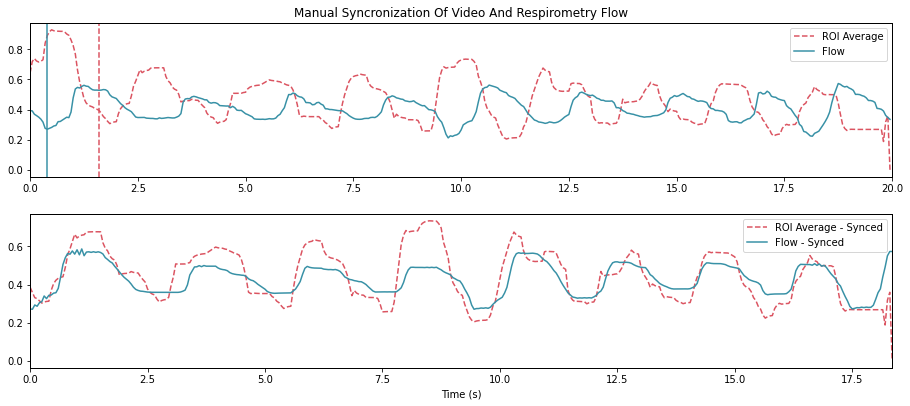

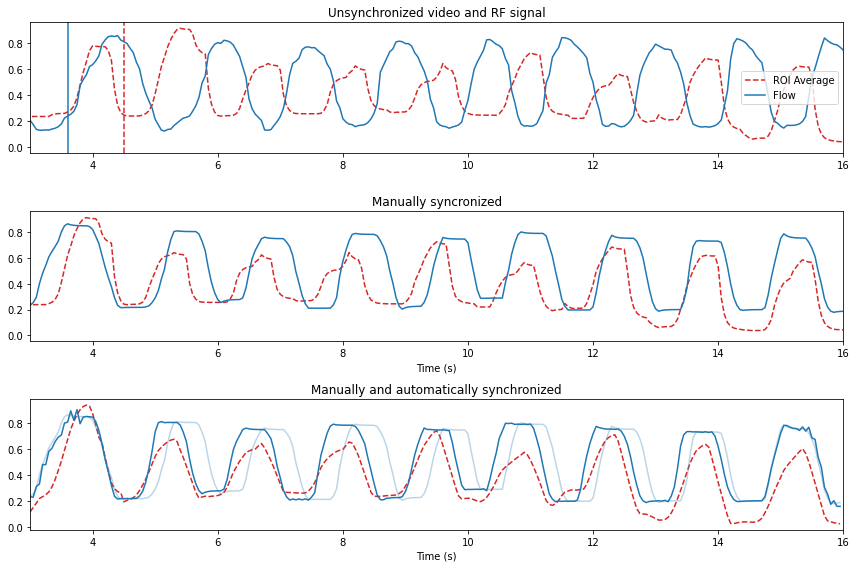

In [23]:
import Functions.VideoUtils as v_utils
import Functions.DataUtils as d_utils
import Functions.GlobalUtils as g_utils
import DATA_INFO as data_info
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt



exclide_list = [5, 8, 11, 17]
trimmed_indexes = [i for i in range(18) if i not in exclide_list]
synced_indexes = [i for i in range(18-len(exclide_list))]

for i in [11]:
    f_max, f_min = d_utils.get_data_max_min(
    data_info.Trimmed.path, 'flow', '{:02d}data.txt')
    normalize_to = [f_max, f_min]

    # index = 6
    index = trimmed_indexes[i]
    data = d_utils.File.read(data_info.Trimmed.path + '/{:02d}data.txt'.format(index))
    data['flow'] = g_utils.normalize(data['flow'], normalize_to[0], normalize_to[1])
    temp_flow, temp_volume, temp_average, temp_position_x, temp_position_y, temp_radius = g_utils.equalize_lists(data['flow'], data['volume'], data['average'],
                                                                                                            data['position_x'], data['position_y'], data['radius'])
    frames_number = len(temp_flow)
    time_span = np.arange(start=0, stop=frames_number/20, step=1/20)
    _median = np.round(g_utils.median_filter(temp_average, 10), 5)

    xlim = [3, 16]

    sync_file = d_utils.File.read(data_info.Trimmed.path + data_info.Trimmed.FileNames.shifts_file)
    t1 = sync_file['vid_delay'][index]
    t2 = sync_file['flow_delay'][index]
    
    t1 = 4.5
    t2 = 3.6

    plt.figure(figsize=(12, 8))
    flow_c = 'tab:blue'
    roi_c = 'tab:red'
    flow_synced_c = 'tab:blue'
    with g_utils.Section_Separator('raw'):

        plt.subplot(3,1,1)
        plt.plot(time_span, _median, alpha=1, c=roi_c, linestyle='dashed')
        plt.plot(time_span, temp_flow, c=flow_c)

        plt.legend(['ROI Average', 'Flow'])

        plt.axvline(x=t1, c=roi_c, linestyle='dashed')
        plt.axvline(x=t2, c=flow_c)

        plt.xlim(xlim)
        plt.tight_layout(pad=2)
        plt.title('(a) Unsynchronized video and RF signal')


    index = index = synced_indexes[i]
    data = d_utils.File.read(data_info.Synced.path + 'unsynced/{:02d}data.txt'.format(index))
    time_span = np.arange(start=0, stop=len(data['average'])/20, step=1/20)

    with g_utils.Section_Separator('filtered'):
        plt.subplot(3,1,2)
        plt.plot(time_span, np.round(g_utils.median_filter(data['average'], 10), 5), alpha=1, c=roi_c, linestyle='dashed')
        plt.plot(np.arange(start=0, stop=len(data['flow'])/20, step=1/20), data['flow'], c=flow_c)

        # plt.legend(['ROI Average - Synced', 'Flow - Synced'])

        plt.xlim([0, 20])
        plt.xlabel('Time (s)')
        plt.xlim(xlim)
        plt.tight_layout(pad=2)
        plt.title("(b) Manually syncronized")

    # plt.savefig('ROI Average - Flow Synced.png', dpi=500)





    fps = 20
    index = synced_indexes[i]
    # xlim = [3, 16]
    data = d_utils.File.read(data_info.Synced.path + 'unsynced/' + data_info.Synced.FileNames.data_name.format(index) + '.txt')
    flow = np.array(data['flow'][int(xlim[0]*fps):int(xlim[1]*fps)])
    avg = np.array(data['average'][int(xlim[0]*fps):int(xlim[1]*fps)])
    avg = g_utils.apply_kernel(avg, np.mean, (7,1))
    # avg = g_utils.apply_kernel(avg, np.mean, (11,1)) 
    synced = g_utils.peak_sync(flow, avg)

    flow_c = 'tab:blue'
    roi_c = 'tab:red'
    flow_synced_c = 'tab:blue'

    time = np.arange(start=xlim[0], stop=xlim[1], step=1/fps)
    # plt.figure(figsize=(12,6))

    # plt.subplot(2,2,2)
    # plt.plot(time, avg, label = 'ROI Pixles Average', c = roi_c, linestyle = 'dashed')
    # plt.plot(time, flow, label = 'Raw Flow Signal', c = flow_c)
    # plt.xlim(xlim)
    # plt.legend()
    # plt.title('Unsynchronized Flow and Video')
    # plt.title('Automatic video And RF signal syncronization')

    time = np.arange(start=xlim[0], stop=xlim[1], step=1/fps)
    plt.subplot(3,1,3)
    plt.plot(time, avg, label = 'ROI Pixles Average', c = roi_c, linestyle = 'dashed')
    plt.plot(time, synced, label = 'Synced Flow Signal', c = flow_synced_c)
    plt.plot(time, flow, alpha = 0.3, label = 'Raw Flow Signal', c = flow_c)
    plt.xlim(xlim)
    # plt.legend()
    plt.title('(c) Manually and automatically synchronized')
    plt.xlabel('Time (s)')

    plt.tight_layout()
    plt.savefig('sync_manual_auto.png', dpi = 500)
    plt.show()
